For this homework, make sure that you format your notbook nicely and cite all sources in the appropriate sections. Programmatically generate or embed any figures or graphs that you need.

Names: Karen Li

Step 1: Train your own word embeddings
--------------------------------

The dataset that I chose from the provided two was the Spooky Authors dataset, from a Kaggle competition. It's a dataset that was initially probably used to determine and predict the writing styles of three different Romantic-era gothic authors. However, I used the text, which was about 440k sentences of prose from the authors' works. The style of the text is fairly formal, written in British English with very few mispellings, but with accents (dropped 'gs on the ends of words, contractions, slurred words) for character dialogue. Therefore, there's a marked difference in narration, which is standard English, and characters' dialects. Additionally, some of the words are antiquated and written in a florid and overly descriptive style (due to its origins in Gothic literature).

Describe what data set you have chosen to compare and contrast with the your chosen provided dataset. Make sure to describe where it comes from and it's general properties.

The dataset I used to compare and contrast with the provided dataset is a set of CNN article headlines from around 2013. It comes from Kaggle as well, and is an English-language dataset containing about 300k unique news articles written by journalists at CNN and the Daily Mail. I'm using the highlights in this dataset, ad the shorter sentences are easier to work with, and took the testing part of the dataset, which comes out to about 55k lines. The style used here is colloquial and terse, as highlights are meant to capture the essence of the article in as few words as possible. Therefore, while the CNN and Gothic lines are both written in English, the former doesn't employ nearly as many rhetorical devices and is much more straightforward. Additionally the CNN authors are writing for a modern audience, so the vocabulary is modernized. Finally, there's probably a lack of dialects in the highlights, as the CNN dataset was meant for a Western English-speaking audience and thus unlikely to include regional dialects.

In [158]:
import sys

import math
import re

from gensim.models import Word2Vec
from sklearn import datasets

### a) Train embeddings on GIVEN dataset

In [159]:
# code to train your word embeddings

# Read the file and prepare the training data 
# so that it is in the following format

# data = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
# 			['this', 'is', 'the', 'second', 'sentence'],
# 			['yet', 'another', 'sentence'],
# 			['one', 'more', 'sentence'],
# 			['and', 'the', 'final', 'sentence']]

# remove all puncutation
# switch to all lowercase
# add <s> and </s> tags
# generate tuples
# read file and prepare data

# file: file path
# length: number of sentences
def preprocessing(file, length):
  my_file = open(file, "r")
  data_into_list = [next(my_file) for x in range(length)]
  my_file.close()

  processedData = []
  for sentence in data_into_list:
    cleaned = re.sub(r'[^a-zA-Z0-9\s]+', '', sentence)
    cleaned = "<s> " + cleaned + " </s>"
    cleaned = cleaned.lower()
    
    words = cleaned.split()
    processedData.append(words)

  return processedData

  
  
class skipgram:
    def __init__(self):
      self.corpus = []
      self.text = []
      self.vocabulary = []
      self.vocabCount = 0
      self.EMBEDDINGS_SIZE = 200
      self.model = ''
    
    def preprocessing(self, file, length):
      my_file = open(file, "r")
      data_into_list = [next(my_file) for x in range(length)]
      my_file.close()

      processedData = []
      for sentence in data_into_list:
        cleaned = re.sub(r'[^a-zA-Z0-9\s]+', '', sentence)
        cleaned = "<s> " + cleaned + " </s>"
        cleaned = cleaned.lower()

        words = cleaned.split()
        processedData.append(words)

        for term in words:
          self.vocabulary.append(term)
      
      self.vocabulary = list(set(self.vocabulary))
      self.vocabCount = len(self.vocabulary)
      self.corpus = processedData

    def train(self):
      #self.vocabulary = list(set(examples))

      model = Word2Vec(size = self.EMBEDDINGS_SIZE, window = 5, min_count = 1, sg = 1, workers = 5) # sg - skip-gram
      model.build_vocab(self.corpus, progress_per=10000)
      model.train(self.corpus, total_examples=model.corpus_count, epochs=30, report_delay=1)

      self.vocabCount = len(model.wv.vocab)
      model.wv.save_word2vec_format('embeddings.txt', binary=False)

      self.model = model



In [160]:

# The dimension of word embedding. 
# This variable will be used throughout the program
# you may vary this as you desire
#EMBEDDINGS_SIZE = 200

# Train the Word2Vec model from Gensim. 
# Below are the hyperparameters that are most relevant. 
# But feel free to explore other 
# options too:
# sg = 1
# window = 5
# size = EMBEDDINGS_SIZE
# min_count = 1

In [161]:
# if you save your Word2Vec as the variable model, this will 
# print out the vocabulary size
#print('Vocab size {}'.format(len(model.wv.vocab)))

In [162]:
# You can save file in txt format, then load later if you wish.
# model.wv.save_word2vec_format('embeddings.txt', binary=False)

### b) Train embedding on YOUR dataset

In [163]:
providedFilePath = "spookystories.txt"
ownFilePath = "cnn.txt"

cb = skipgram()
cb.preprocessing(providedFilePath, 200)
cb.train()

cb2 = skipgram()
cb2.preprocessing(ownFilePath, 500)
cb2.train()


What text-normalization and pre-processing did you do and why?

The text normalization and pre-processing that I did was fairly simple; first, I stripped the text of all characters but alphanumeric characters and spaces, removing all puncutation and switching the text to lowercase. This has the effect of simplifying the text without removing context, as a proper noun is proper regardless whether it is capitalized. For instance, 'California' can be registered as a proper noun even spelt as 'california'. Removing all puncutation also cuts down on complexity, as skip-gram doesn't deal with clauses. Finally, I prepended < s > to the beginning of each sentence, as indicated by newline characters and added < / s> to the end of each sentence as a way of marking sentence endings. This is significant as certain types of words like pronouns and proper nouns (I, he/they/she) are more likely to be used as the first word in a sentence, whereas an adverb is less likely to be used first. < s > and < /s > therefore are added as words in the sliding window of words for each embedding.

Step 2: Evaluate the differences between the word embeddings
----------------------------

(make sure to include graphs, figures, and paragraphs with full sentences)

/var/folders/gh/96n2f5tx5yv8ywqs48jsyz7m0000gn/T/ipykernel_54967/66241107.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  for word in dataset.model.wv.vocab:
/Users/karenli/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/karenli/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/var/folders/gh/96n2f5tx5yv8ywqs48jsyz7m0000gn/T/ipykernel_54967/66241107.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  for word in dataset.model.wv.vocab:
/Users/karenli/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: T

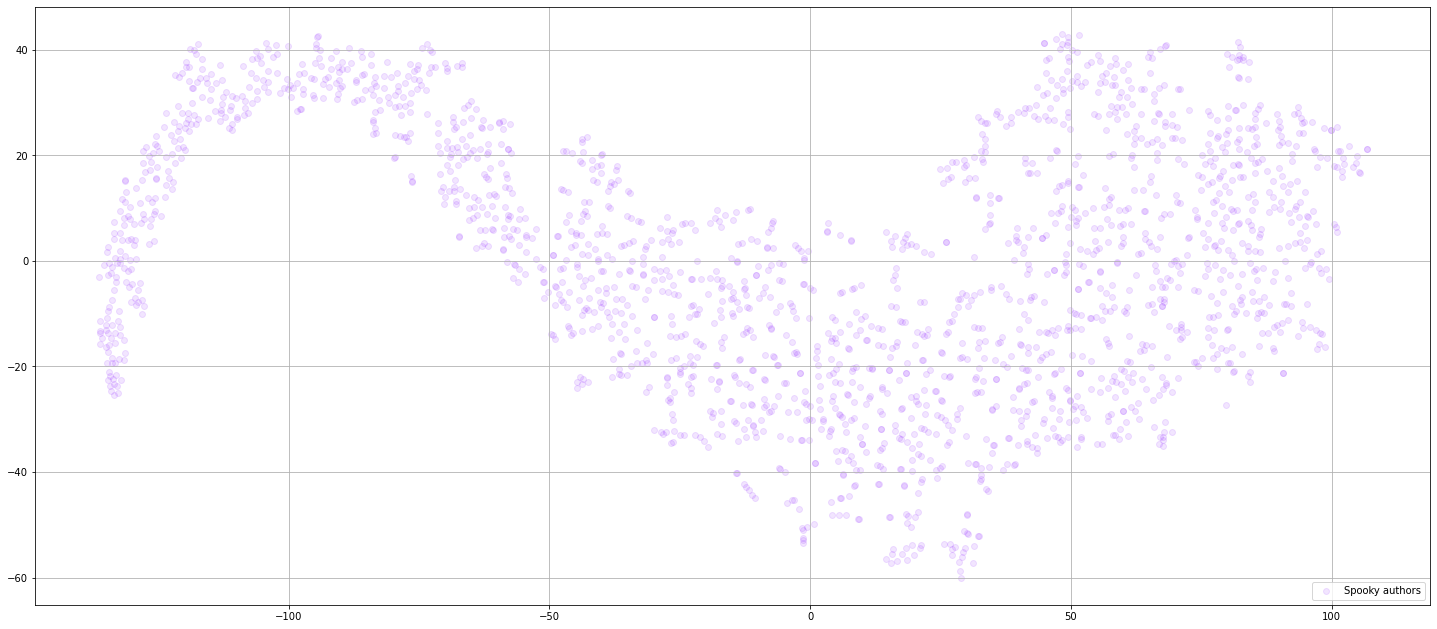

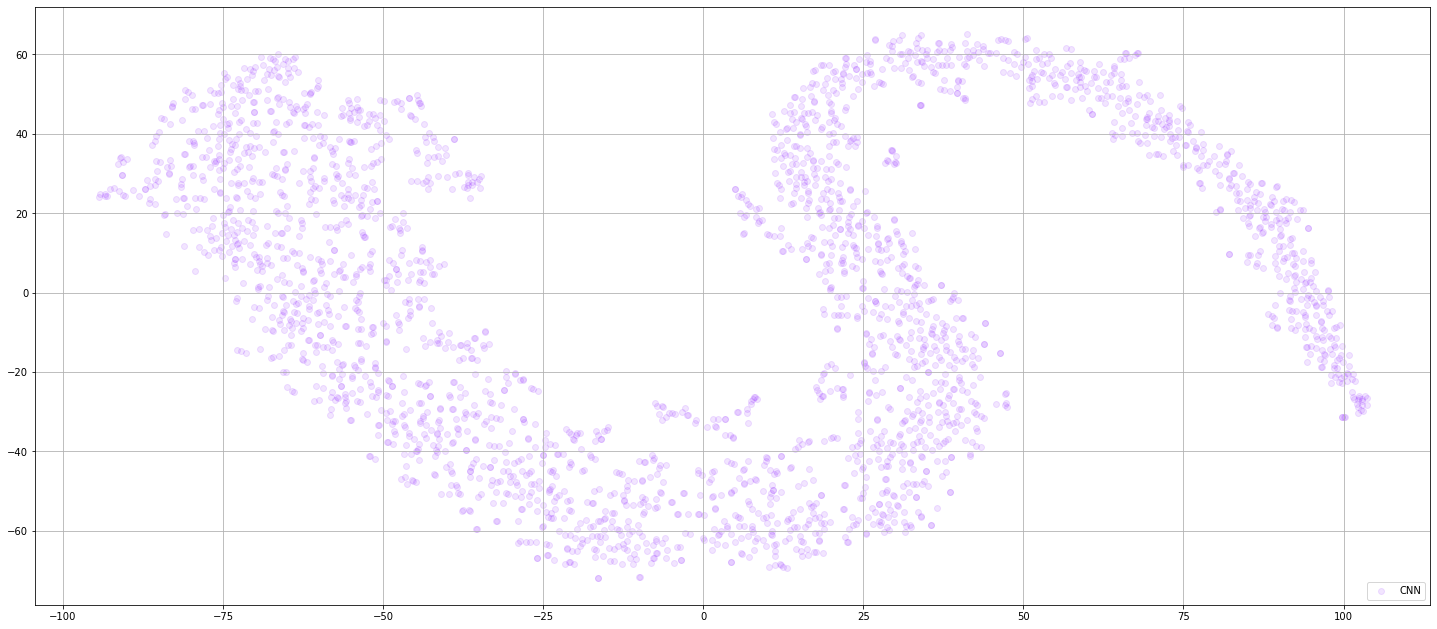

In [183]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def setUpVisualization(dataset):
    words = []
    embeddings = []

    for word in dataset.model.wv.vocab:
        embeddings.append(dataset.model[word])
        words.append(word)
    


    tsne_visualization = TSNE(perplexity= 20, n_components= 2, init='pca', n_iter=2000, random_state = 32)
    #print(tsne_visualization)
    embeddings = np.asarray(embeddings)
    embeddings_graph = tsne_visualization.fit_transform(embeddings)

    return embeddings_graph

def plotGraph(labels, title, embed, words = [], a = 1):
    plt.figure(figsize = (25, 11))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embed[:,0]
    y = embed[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=labels)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig(title + ".png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

spooky_embed = setUpVisualization(cb)
CNN_embed = setUpVisualization(cb2)
plotGraph("Spooky authors", "spooky", spooky_embed, a = 0.1)
plotGraph("CNN", "CNN", CNN_embed, a = 0.1)    



##Write down your analysis:

Cite your sources:
-------------

Step 3: Feedforward Neural Language Model
--------------------------

### a) First, encode  your text into integers

In [184]:
# Importing utility functions from Keras
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Embedding

# The size of the ngram language model you want to train
# change as needed for your experiments
NGRAM = 3 

# Initializing a Tokenizer
# It is used to vectorize a text corpus. Here, it just creates a mapping from 
# word to a unique index. (Note: Indexing starts from 0)
# Example:
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(data)
# encoded = tokenizer.texts_to_sequences(data)


ModuleNotFoundError: No module named 'tensorflow'

### b) Next, prepare your sequences from text

#### Fixed ngram based sequences 

In [ ]:
def generate_ngram_training_samples(ngram: list) -> list:
    '''
    Takes the encoded data (list of lists) and 
    generates the training samples out of it.
    Parameters:
    up to you, we've put in what we used
    but you can add/remove as needed
    return: 
    list of lists in the format [[x1, x2, ... , x(n-1), y], ...]
    '''
    pass


### c) Then, split the sequences into X and y and create a Data Generator

In [ ]:
# Note here that the sequences were in the form: 
# sequence = [x1, x2, ... , x(n-1), y]
# We still need to separate it into [[x1, x2, ... , x(n-1)], ...], [y1, y2, ...]

In [ ]:
def read_embeddings():
    '''Loads and parses embeddings trained in earlier.
    Parameters and return values are up to you.
    '''
    
    # you may find generating the following two dicts useful:
    # word to embedding : {'the':[0....], ...}
    # index to embedding : {1:[0....], ...} 
    # use your tokenizer's word_index to find the index of
    # a given word
    pass



In [ ]:
def data_generator(X: list, y: list, num_sequences_per_batch: int) -> (list,list):
    '''
    Returns data generator to be used by feed_forward
    https://wiki.python.org/moin/Generators
    https://realpython.com/introduction-to-python-generators/
    
    Yields batches of embeddings and labels to go with them.
    Use one hot vectors to encode the labels 
    (see the to_categorical function)
    
    '''
    pass



In [ ]:
# Examples
# initialize data_generator
# num_sequences_per_batch = 128 # this is the batch size
# steps_per_epoch = len(sequences)//num_sequences_per_batch  # Number of batches per epoch
# train_generator = data_generator(X, y, num_sequences_per_batch)

# sample=next(train_generator) # this is how you get data out of generators
# sample[0].shape # (batch_size, (n-1)*EMBEDDING_SIZE)  (128, 200)
# sample[1].shape   # (batch_size, |V|) to_categorical

### d) Train your models

In [ ]:
# code to train a feedforward neural language model 
# on a set of given word embeddings
# make sure not to just copy + paste to train your two models

# Define the model architecture using Keras Sequential API



In [ ]:
# Start training the model
model.fit(x=train_generator, 
          steps_per_epoch=steps_per_epoch,
          epochs=1)

### e) Generate Sentences

In [ ]:
# generate a sequence from the model
def generate_seq(model: Sequential, 
                 tokenizer: Tokenizer, 
                 seed: list, 
                 n_words: int):
    '''
    Parameters:
        model: your neural network
        tokenizer: the keras preprocessing tokenizer
        seed: [w1, w2, w(n-1)]
        n_words: generate a sentence of length n_words
    Returns: string sentence
    '''
    pass

### f) Compare your generated sentences

Sources Cited
----------------------------
